In [ ]:
# statistická rozdělení a testování statistických hypotéz

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [74]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

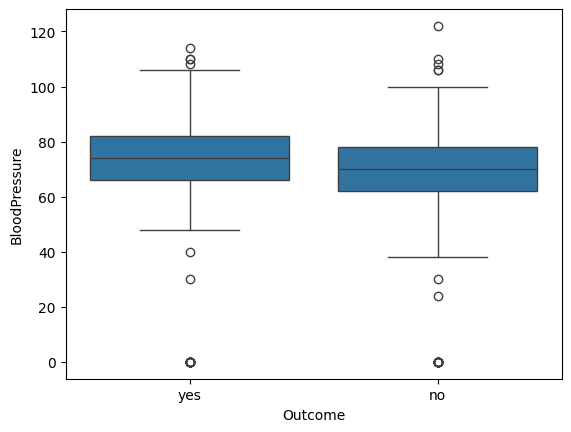

In [75]:
data = pd.read_csv("diabetes.csv")
labels = {0: "no", 1: "yes"}
data["Outcome"] = data["Outcome"].map(labels)
sns.boxplot(data, x="Outcome", y="BloodPressure")

In [76]:
data["Outcome"]

0      yes
1       no
2      yes
3       no
4      yes
      ... 
763     no
764     no
765     no
766    yes
767     no
Name: Outcome, Length: 768, dtype: object

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

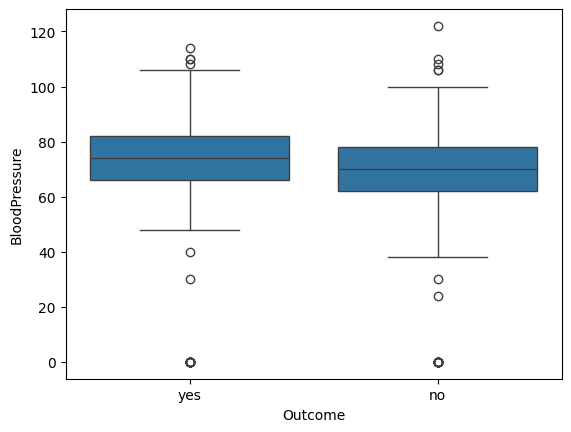

In [77]:
sns.boxplot(data, x="Outcome", y="BloodPressure")

In [78]:
np.quantile(data)

TypeError: quantile() missing 1 required positional argument: 'q'

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

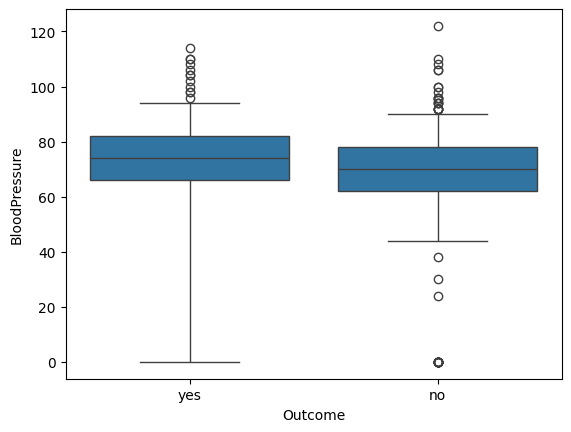

In [79]:
sns.boxplot(data, x="Outcome", y="BloodPressure", whis=[5, 95])

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

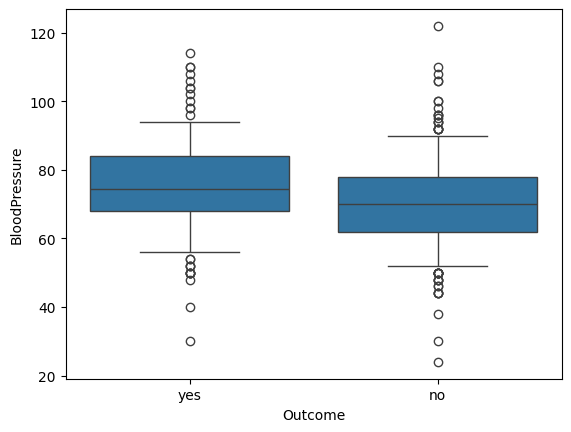

In [80]:
data = data[data["BloodPressure"] > 0]
sns.boxplot(data, x="Outcome", y="BloodPressure", whis=[5, 95])

In [81]:
data_yes = data[data["Outcome"] == "yes"]
np.quantile(data_yes["BloodPressure"], 0.25)

68.0

In [85]:
data_yes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,4.924603,141.408730,75.321429,23.452381,106.706349,35.210714,0.558111,37.420635
std,3.692119,32.474256,12.299866,17.355944,140.635358,6.931624,0.377606,11.107482
min,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,2.000000,118.000000,68.000000,0.000000,0.000000,30.900000,0.267000,28.000000
50%,5.000000,140.000000,74.500000,28.000000,53.000000,34.300000,0.451500,36.000000
75%,8.000000,167.250000,84.000000,36.000000,175.000000,38.500000,0.731250,45.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [20]:
np.quantile(data_yes["BloodPressure"], 0.75)

84.0

In [21]:
q3 = np.quantile(data_yes["BloodPressure"], 0.75)
q1 = np.quantile(data_yes["BloodPressure"], 0.25)

In [22]:
lower_limit = q1 - (q3 - q1)*1.5
data_yes[data_yes["BloodPressure"] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,yes
125,1,88,30,42,99,55.0,0.496,26,yes


<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

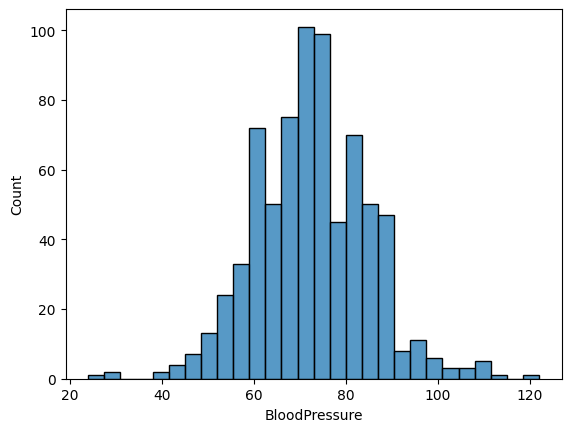

In [24]:
#funkce hustoty
sns.histplot(data=data, x="BloodPressure")

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

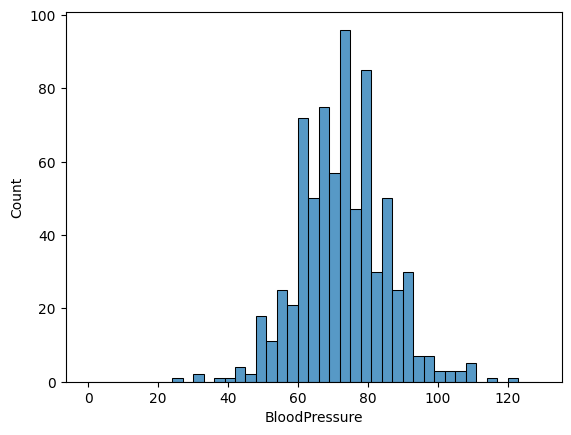

In [25]:
sns.histplot(data=data, x="BloodPressure", bins=range(0, 130, 3))

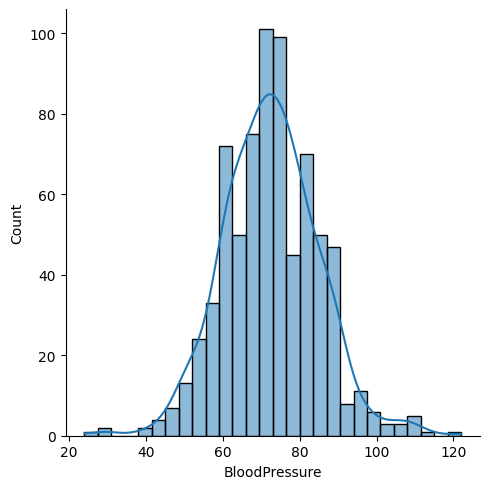

In [26]:
sns.displot(data=data, x="BloodPressure", kde=True)

In [60]:
data = pd.read_csv("WA_Marketing-Campaign.csv")

In [61]:
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,2,5,2,1,27.81
1,1,Medium,2,5,2,2,34.67
2,1,Medium,2,5,2,3,27.98
3,1,Medium,2,5,2,4,27.72
4,1,Medium,3,12,1,1,44.54


In [62]:
data["Promotion"].value_counts()

2    188
1    172
Name: Promotion, dtype: int64

In [63]:
#Promotion - typ propagace, která byla pro daný obchod provedena (existují 2 možné hodnoty, tj. máme dvě různé marketingové kampaně).
#SalesInThousands - tržby v tisících.
#MarketSize - velikost trhu v dané lokalitě.

In [64]:
data = data[data['MarketSize'] == "Medium"]



In [65]:
data = data.reset_index() # data, na kterých resetujeme index

In [68]:
#data["Promotion"].value_counts()
data

,index,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,0,1,Medium,2,5,2,1,27.81
1,1,1,Medium,2,5,2,2,34.67
2,2,1,Medium,2,5,2,3,27.98
3,3,1,Medium,2,5,2,4,27.72
4,4,1,Medium,3,12,1,1,44.54
...,...,...,...,...,...,...,...,...
199,287,9,Medium,807,1,2,4,55.91
200,288,9,Medium,810,13,1,1,49.30
201,289,9,Medium,810,13,1,2,61.80
202,290,9,Medium,810,13,1,3,58.00


In [67]:
data_promotion_1 = data[data["Promotion"] == 1]
data_promotion_2 = data[data["Promotion"] == 2]

In [69]:
data_promotion_1["SalesInThousands"]

4      44.54
5      37.94
6      45.49
7      34.75
16     42.92
       ...  
195    60.44
200    49.30
201    61.80
202    58.00
203    55.20
Name: SalesInThousands, Length: 96, dtype: float64

In [71]:
stats.normaltest(data_promotion_1["SalesInThousands"])

NormaltestResult(statistic=7.671792543063383, pvalue=0.021581986479073396)

In [86]:
stats.normaltest(data_promotion_2["SalesInThousands"])

NormaltestResult(statistic=2.804048717620895, pvalue=0.2460982681449423)

In [87]:
statistics, pvalue = stats.mannwhitneyu(data_promotion_1["Promotion"], data_promotion_2["Promotion"])
pvalue

4.717727055166662e-46

In [90]:
hotely = pd.read_csv("global_hotel_reviews.csv")

In [91]:
hotely.head()

,Rating,Date,Description,Hotel_name,City,Country
0,10,18-09-2023,Très bon hôtel comme attendu. On s’occupe de v...,barriere-le-majestic,Cannes,France
1,10,05-09-2023,Magnifique hôtel \nTrès belles prestations \nP...,barriere-le-majestic,Cannes,France
2,8,31-10-2022,"personnel à l'écoute et agréable, mais les cha...",barriere-le-majestic,Cannes,France
3,10,03-09-2022,"Accueil chaleureux, bon service et bonne nourr...",barriere-le-majestic,Cannes,France
4,10,07-12-2021,"Excellent Hotel bien situé, excellent service ...",barriere-le-majestic,Cannes,France


<AxesSubplot: xlabel='Rating', ylabel='count'>

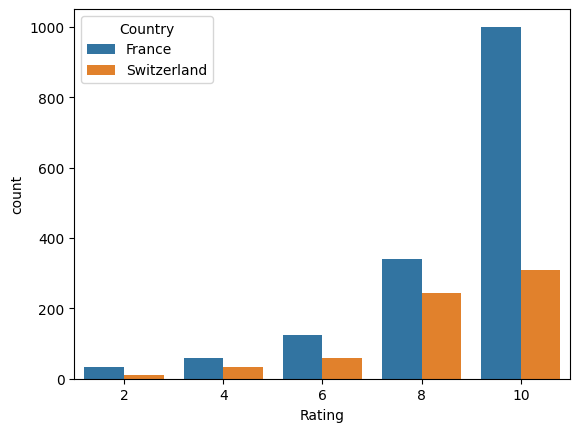

In [105]:

sns.countplot(data=hotely, x = "Rating", hue="Country")

In [115]:
Francie = hotely[hotely["Country"] == "France"]
Switzerland = hotely[hotely["Country"] == "Switzerland"]

In [116]:
Switzerland["Rating"].mean()

8.441754916792739

In [117]:
_,pvalue = stats.mannwhitneyu(Francie["Rating"],Switzerland["Rating"])
pvalue

2.7190215861872277e-11

In [119]:
platy = pd.read_csv("salaries-2022.csv")
platy.head()



,Surname,Given name,Position title,Salary paid ($),Taxable benefits ($)
0,ABDEL-RAHMAN,EIHAB,Professor,"210,256.84",301.76
1,ABOUEE MEHRIZI,HOSSEIN,Associate Professor,"206,893.56",630.20
2,ABUKHDEIR,NASSER M.,Associate Professor,"176,116.32",591.56
3,ACHESON,KATHERINE,Professor,"193,308.12",708.72
4,ACKER,STACEY,Associate Professor,"135,384.80",469.72


In [133]:
platy["Salary paid ($)"] = platy["Salary paid ($)"].str.replace(",","").astype(float)

<AxesSubplot: xlabel='Position title', ylabel='Count'>

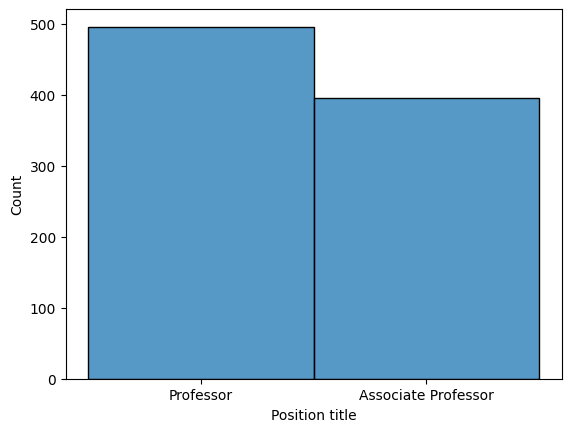

In [134]:
#Tvým úkolem je ověřit tvrzení, že s kariérním postupem vzroste akademickým pracovníkům
#a pracovnicím jejich průměrný plat.
profesor = platy[platy["Position title"] == 'Professor']
docent = platy[platy["Position title"] == 'Associate Professor']




In [135]:
profesor["Salary paid ($)"].mean()

208224.88491935484

In [136]:
docent["Salary paid ($)"].mean()

169241.11055696203

<AxesSubplot: xlabel='Salary paid ($)', ylabel='Count'>

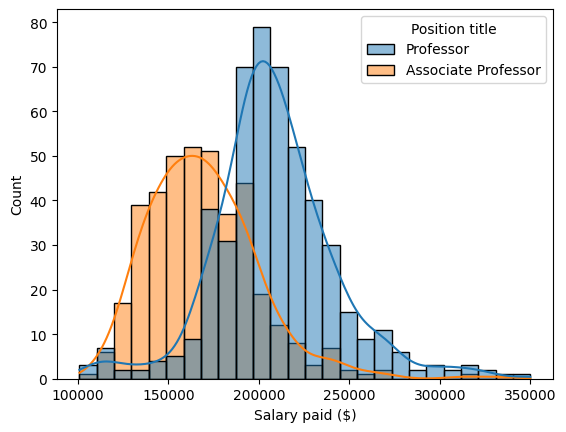

In [145]:
sns.histplot(data=platy, x="Salary paid ($)",hue = "Position title",kde = True)

In [140]:
#H0 - Průměrné platy jsou shodné
#H1 -  Průměrný plat na pozici Professor je vyšší než na pozici Associate Professor.

In [142]:
stats.normaltest(profesor["Salary paid ($)"])

NormaltestResult(statistic=37.066560324413814, pvalue=8.935085116360102e-09)

In [143]:
stats.normaltest(docent["Salary paid ($)"])

NormaltestResult(statistic=89.52707024095415, pvalue=3.626132812192355e-20)

In [144]:
_, pvalue = stats.mannwhitneyu(profesor["Salary paid ($)"], docent["Salary paid ($)"], alternative="greater")
pvalue

3.1384171623279043e-65

In [1]:
#čtení na doma

In [2]:
#H0: Platy za kuřáky (kuřačky) jsou v průměru stejné jako platby za nekuřáky (nekuřačky).
#H1: Platy za kuřáky (kuřačky) jsou vyšší (greater) platby za nekuřáky (nekuřačky).



In [5]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
data_smokers = data[data["smoker"] == "yes"]
data_not_smokers = data[data["smoker"] == "no"]

In [9]:
data_smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [10]:
stats.normaltest(data_smokers["charges"])

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [11]:
stats.normaltest(data_not_smokers["charges"])

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [12]:
_, pvalue = stats.mannwhitneyu(data_smokers["charges"], data_not_smokers["charges"], alternative="greater")

In [13]:
np.format_float_positional(pvalue)

'0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000026351167222517853'

In [14]:
# test s jedním výběrem
# test na průměr 

In [15]:
#H0: Průměrná výška basketbalistek v České republice je 180 cm
#H1: Průměrná výška basketbalistek v České republice je více než 180 cm

import pandas
from scipy import stats

data = [170, 180, 175, 183, 178, 182, 185, 176, 179, 181]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 180)
print(res)

TtestResult(statistic=-0.7936270159024009, pvalue=0.44783036238501905, df=9)


In [16]:
#H0: Průměrná chyba při výrobě součástky do motoru je 0.1 mm
#H1: Průměrná chyba při výrobě součástky do motoru je méně než 0.1 mm
data = [0.12, 0.10, 0.11, 0.13, 0.09, 0.11, 0.12, 0.10, 0.11, 0.12]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 0.1, alternative="less")
print(res)

TtestResult(statistic=2.905487990874554, pvalue=0.9912805695458283, df=9)


In [17]:
#H0: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 je 5 minut
#H1: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 není 5 minut (tj. je méně nebo více než 5 minut)
data = [5.1, 4.9, 5.2, 4.8, 5.0, 5.1, 4.9, 5.2, 4.8, 5.0]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 0.1, alternative="less")
print(res)

TtestResult(statistic=103.94469683442252, pvalue=0.9999999999999982, df=9)


In [18]:
#Testy na rozdělení

In [20]:
#H0: Ceny domů mají normální rozdělení
#H1: Ceny domů nemají normální rozdělení

In [23]:
data = [0.74590569, 1.74565776, 0.58570378, 0.95159044, 0.58572699, 1.20722768, 0.38527559, 1.70051498, 1.10369079, 1.18765377, 1.7503144, 
        0.40093026, 1.2216318,  1.45744714, 1.95942974, 1.08444009, 1.07266436, 0.88722675, 0.48954167, 1.50261749, 1.27005193, 1.026523, 1.44374599, 1.54176153, 0.51657773]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.shapiro(data["sloupec_1"])
res

ShapiroResult(statistic=0.9605264012916015, pvalue=0.4250591639995579)

In [24]:
res = stats.normaltest(data["sloupec_1"])
res

NormaltestResult(statistic=1.8353668908225964, pvalue=0.39944330233531283)

In [25]:
data["sloupec_1"]
stats.kstest(data["sloupec_1"], stats.norm.cdf)

KstestResult(statistic=0.649983377679607, pvalue=7.563148425063538e-11, statistic_location=0.38527559, statistic_sign=-1)

In [26]:
# testy se dvěma statistickými soubory

In [27]:
# testy na průměr

In [28]:
#Příklad hypotéz:

#H0: Rychlost montáže pracovníků před školením byla stejná jako po školení
#H1: Rychlost montáže pracovníků před školením byla jiná než je po školení

In [30]:
data = [
    [10.5, 12.2],  # Pracovník 1
    [9.8, 11.4],   # Pracovník 2
    [10.2, 11.7],  # Pracovník 3
    [10.1, 12.3],  # Pracovník 4
    [9.9, 11.6],   # Pracovník 5
    [10.6, 12.1],  # Pracovník 6
    [9.7, 11.9],   # Pracovník 7
    [10.3, 12.0],  # Pracovník 8
    [9.6, 11.8],   # Pracovník 9
    [10.4, 12.4],  # Pracovník 10
    [10.0, 12.5],  # Pracovník 11
    [9.5, 11.3],   # Pracovník 12
    [10.7, 12.6],  # Pracovník 13
    [9.4, 11.2],   # Pracovník 14
    [10.8, 12.7]   # Pracovník 15
]
data = pandas.DataFrame(data,columns =["sloupec_1", "sloupec_2"])
res = stats.ttest_rel(data["sloupec_1"],data["sloupec_2"])
res

TtestResult(statistic=-25.03753938346132, pvalue=5.020951754927011e-13, df=14)

In [32]:
#Pro nepárové testy můžeme mít následující hypotézy:

#H0: Rychlost montáže pracovníků v obou sledovaných směnách je stejná
#H1: Rychlost montáže pracovníků v obou sledovaných směnách je různá

In [33]:
data = [
    [12.2, 12.4], # První pracovník směny 1 a první pracovník směny 2
    [11.4, 11.5], # Druhý pracovník směny 1 a druhý pracovník směny 2
    [11.7, 11.8], 
    [12.3, 12.2], 
    [11.6, 11.7], 
    [12.1, 12.3], 
    [11.9, 11.8], 
    [12.0, 12.1], 
    [11.8, 11.7], 
    [12.4, 12.5], 
    [11.9, 12.4], 
    [12.7, 11.4], 
    [10.3, 12.7], 
    [9.11, 11.3], 
    [12.5, 12.6]
    ]

data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.ttest_ind(data["sloupec_1"], data["sloupec_2"])
res

TtestResult(statistic=-1.1295989413722716, pvalue=0.2682298704518597, df=28.0)

In [34]:
#testy na rozdělení
#Pro párový test můžeme formulovat hypotézy:

#H0: Rozdělení rychlosti montáže pracovníků po školení je stejná jako před školením
#H1: Rozdělení rychlosti montáže pracovníků po školení je jiná než před školením

In [35]:
scaled_data = [
    [18.4, 11.7], # Pracovník 1
    [11.8, 14.0], # Pracovník 2
    [14.8, 8.7], # Pracovník 3
    [13.2, 12.5], # Pracovník 4
    [16.3, 12.3], # Pracovník 5
    [9.6, 11.9], # Pracovník 6
    [14.5, 8.4], # Pracovník 7
    [13.0, 10.4], # Pracovník 8
    [11.8, 15.7], # Pracovník 9
    [11.4, 13.6], # Pracovník 10
    [9.2, 9.8], # Pracovník 11
    [13.2, 11.5], # Pracovník 12
    [12.0, 9.9], # Pracovník 13
    [11.7, 12.9], # Pracovník 14
    [13.1, 11.2] # Pracovník 15
]

data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.wilcoxon(data["sloupec_1"], data["sloupec_2"])
res

WilcoxonResult(statistic=32.5, pvalue=0.12054443359375)

In [ ]:
#Pro nepárová pozorování můžeme formulovat hypotézy:

#H0: Rozdělení rychlosti montáže v obou sledovaných směnách jsou stejná
#H1: Rozdělení rychlosti montáže v obou sledovaných směnách jsou různá


In [36]:
data = [
    [12.2, 12.4], # První pracovník směny 1 a první pracovník směny 2
    [11.4, 11.5], # Druhý pracovník směny 1 a druhý pracovník směny 2
    [11.7, 11.8], 
    [12.3, 12.2], 
    [11.6, 11.7], 
    [12.1, 12.3], 
    [11.9, 11.8], 
    [12.0, 12.1], 
    [11.8, 11.7], 
    [12.4, 12.5], 
    [11.9, 12.4], 
    [12.7, 11.4], 
    [10.3, 12.7], 
    [9.11, 11.3], 
    [12.5, 12.6]
    ]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.mannwhitneyu(data["sloupec_1"], data["sloupec_2"])
res

MannwhitneyuResult(statistic=99.0, pvalue=0.5889500869266057)

In [37]:
#testy závislosti kategoriálních dat
#Hypotézy mohou být například následující:

#H0: Oblíbený předmět nezávisí na pohlaví
#H1: Oblíbený předmět závisí na pohlaví

In [38]:
data = [    
    ['female', 'coffee'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['female', 'tea'],
    ['female', 'coffee'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'tea'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'coffee'],
    ['female', 'juice'],
    ['female', 'tea'],
    ['female', 'coffee'],
    ['female', 'tea'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['male', 'tea'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'coffee'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['female', 'coffee'],
    ['female', 'coffee'],
    ['male', 'tea'],
    ['male', 'juice'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['female', 'juice'],
    ['male', 'coffee'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['female', 'tea'],
    ['male', 'juice'],
    ['female', 'juice'],
    ['female', 'tea'],
    ['male', 'juice'],
    ['male', 'coffee'],
    ['male', 'juice']
]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
# Pro použití testu musíme vytvořit kontingenční tabulku
data = pandas.pivot_table(data, "sloupec_1", "sloupec_1", "sloupec_2",aggfunc=len)
res = stats.chi2_contingency(data)
res

Chi2ContingencyResult(statistic=1.4818062200956932, pvalue=0.47668322366030635, dof=2, expected_freq=array([[9.95238095, 7.85714286, 4.19047619],
       [9.04761905, 7.14285714, 3.80952381]]))

In [39]:
#Test statistické významnosti korelace¶
#Uvažujme následující hypotézy:

#H0: Cena domu a obytná plocha domu nejsou statisticky závislé
#H1: Cena domu a obytná plocha domu jsou statisticky závislé

In [41]:
# Pearson 
# Takto zjistíme výsledek, i když na tato konkrétní data bychom test založení na Pearsonově koeficientu používat neměli, data nemají normální rozdělení.

data = pandas.read_csv("house_prices.csv")
res = stats.pearsonr(data["SalePrice"], data["GrLivArea"])
res

PearsonRResult(statistic=0.7205163006738732, pvalue=1.939850320501527e-233)

In [42]:
# Spearman
data = pandas.read_csv("house_prices.csv")
res = stats.spearmanr(data["SalePrice"], data["GrLivArea"])
res

SignificanceResult(statistic=0.7312378789702222, pvalue=7.801875110918258e-244)

In [43]:
# Kendall tau
data = pandas.read_csv("house_prices.csv")
res = stats.kendalltau(data["SalePrice"], data["GrLivArea"])
res

SignificanceResult(statistic=0.543863812013887, pvalue=1.995410251143093e-211)

In [44]:
# testy s třemi a více statistickými soubory 
# testy na průměr
#Pro test můžeme formulovat hypotézy:

#H0: Průměrný čas montáže je stejný u pracovníků všech tří směn
#H1: Průměrný čas montáže různý alespoň dvě směny

#Pokud mají všechny soubory normální rozdělení a stejný roptyl, můžeme použít ANOVA test. Pokud data nemají normální rozdělení, je možné využít neparametrický Kruskall-Wallis test

In [45]:
# testy na rozptyl
#Test na variabilitu umožňují porovnat variabilitu tří a více souborů. Lze je použít i k rozhodnutí, zda je vhodné použití testu ANOVA.

#Pro test můžeme formulovat hypotézy:

#H0: Rozptyl času montáže je stejný u pracovníků všech tří směn
#H1: Rozptyl času montáže se liší alespoň pro dvě směny
#Pokud mají všechny soubory normální rozdělení, můžeme použít Levenův test. Pokud data nemají normální rozdělení, je možné použít Bartlettův test.

In [1]:
# kvíz

In [5]:
data = [4, 15, 7, 12, 3, 8, 19, 10]
data = pd.DataFrame(data, columns=["sloupec_1"])
data

,sloupec_1
0,4
1,15
2,7
3,12
4,3
5,8
6,19
7,10


In [6]:
np.quantile(data["sloupec_1"], 0.3)

7.1

In [7]:
np.quantile(a=[12, 13, 14] ,q=[0.50])

array([13.])

In [28]:
#data_yes = data[data["Outcome"] == "yes"]

data = pd.DataFrame({"body": [12, 13, 14]})
#data = a[a["BloodPressure"] == a]
data
print(data["body"].median())
print(data["body"].mean())

13.0
13.0
